Spotify Music Analysis

In [1]:
#Data Set - Spotify 2010 - 2019 Top 100 Songs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#from pandas.plotting import autocorrelation_plot
#import seaborn as sns
#from pandas.plotting import scatter_matrix
#from pandas.plotting import autocorrelation_plot
#from pandas.plotting import parallel_coordinates
#from pandas.plotting import lag_plot

In [2]:
df = pd.read_csv("Spotify 2010 - 2019 Top 100.csv")

In [3]:
df.columns

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [5]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [6]:
df.isnull().sum()

title            0
artist           0
top genre        0
year released    0
added            0
bpm              0
nrgy             0
dnce             0
dB               0
live             0
val              0
dur              0
acous            0
spch             0
pop              0
top year         0
artist type      0
dtype: int64

In [7]:
df = df.drop(columns=['added'])
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo


In [8]:
df["top genre"].value_counts() # 132 top genres for categories 

dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
                   ... 
french shoegaze       1
new french touch      1
hip pop               1
australian psych      1
uk drill              1
Name: top genre, Length: 132, dtype: int64

In [9]:
#Use encoder to create values for the Categories in Top Genre
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df['genre_cat']= ""
df['genre_cat'] = ord_enc.fit_transform(df[["top genre"]])
df[['top genre', 'genre_cat']].head()


,top genre,genre_cat
0,dance pop,51.0
1,dance pop,51.0
2,pop soul,122.0
3,atl hip hop,14.0
4,atl hip hop,14.0


In [10]:
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018,155,73,83,-4,12,45,313,1,22,86,2019,Solo,85.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0


In [11]:
#Use encoder to create values for the Categories in Artist type

ord_enc = OrdinalEncoder()
df['artist_cat']= ""
df['artist_cat'] = ord_enc.fit_transform(df[["artist type"]])
df[['artist type', 'artist_cat']].head()

,artist type,artist_cat
0,Duo,1.0
1,Duo,1.0
2,Solo,2.0
3,Solo,2.0
4,Solo,2.0


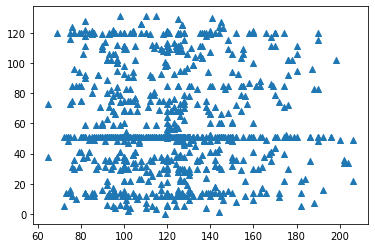

In [12]:
plt.scatter(df.bpm ,df.genre_cat,marker="^")
plt.show()

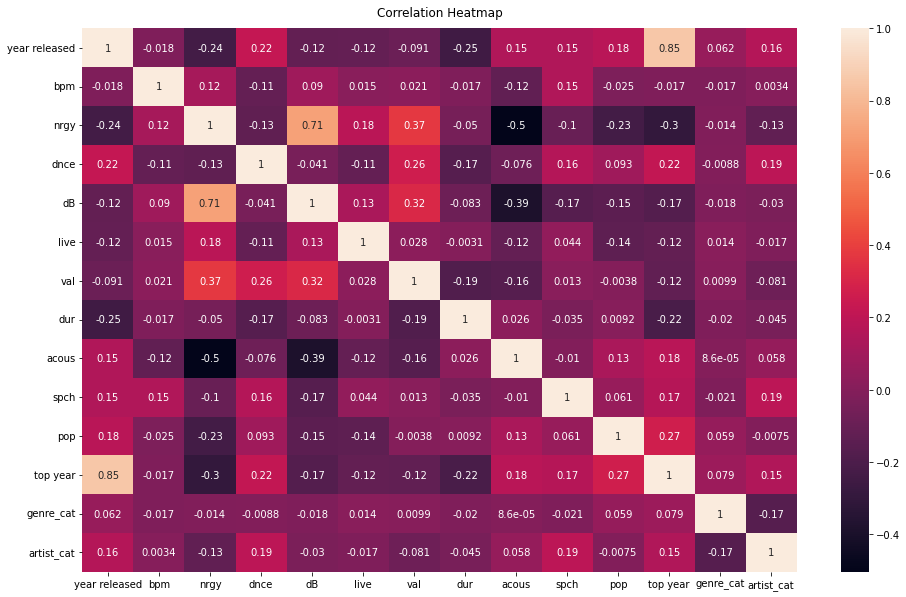

In [13]:
import seaborn as sns

plt.figure(figsize=(16,10))

corr_heat = sns.heatmap(df.corr(), annot=True)
corr_heat.set_title("Correlation Heatmap", pad=12);
plt.show()

There is a high correlation between genre and top year. This implies that certain genres are popular in a specific year.

# Recommendation System using K-means Clustering

In [14]:
df = df.drop_duplicates(subset='title')
df

,title,artist,top genre,year released,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type,genre_cat,artist_cat
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,140,81,61,-6,23,23,203,0,6,70,2010,Duo,51.0,1.0
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,138,89,68,-4,36,83,192,1,8,68,2010,Duo,51.0,1.0
2,I Need A Dollar,Aloe Blacc,pop soul,2010,95,48,84,-7,9,96,243,20,3,72,2010,Solo,122.0,2.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,93,87,66,-4,4,38,180,11,12,80,2010,Solo,14.0,2.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,104,85,69,-6,9,74,268,39,5,79,2010,Solo,14.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,2019,85,67,77,-6,6,71,171,1,6,81,2019,Solo,120.0,2.0
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,80,50,55,-9,80,41,190,23,7,85,2019,Solo,85.0,2.0
997,Boasty (feat. Idris Elba),Wiley,grime,2019,103,77,89,-5,9,46,177,1,7,68,2019,Solo,83.0,2.0
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,138,58,53,-6,10,59,214,1,10,67,2019,Duo,4.0,1.0


In [15]:
df_subset = df[['title', 'artist', 'top genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'acous', 'spch', 'pop']]
df_subset

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79
...,...,...,...,...,...,...,...,...,...,...,...,...
994,You Need To Calm Down,Taylor Swift,pop,85,67,77,-6,6,71,1,6,81
996,EARFQUAKE,"Tyler, The Creator",hip hop,80,50,55,-9,80,41,23,7,85
997,Boasty (feat. Idris Elba),Wiley,grime,103,77,89,-5,9,46,1,7,68
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,138,58,53,-6,10,59,1,10,67


In [16]:
import copy
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [17]:
df1=copy.deepcopy(df_subset)
df1.drop(columns=['title','artist','top genre', 'pop'],inplace=True)
df1

,bpm,nrgy,dnce,dB,live,val,acous,spch
0,140,81,61,-6,23,23,0,6
1,138,89,68,-4,36,83,1,8
2,95,48,84,-7,9,96,20,3
3,93,87,66,-4,4,38,11,12
4,104,85,69,-6,9,74,39,5
...,...,...,...,...,...,...,...,...
994,85,67,77,-6,6,71,1,6
996,80,50,55,-9,80,41,23,7
997,103,77,89,-5,9,46,1,7
998,138,58,53,-6,10,59,1,10


In [18]:
from sklearn.preprocessing import MinMaxScaler

d_types = ['int16','int32', 'int64', 'float16', 'float32', 'float64']
normalize = df1.select_dtypes(include=d_types)
print(normalize)

for col in normalize.columns:
    MinMaxScaler(col)

     bpm  nrgy  dnce  dB  live  val  acous  spch
0    140    81    61  -6    23   23      0     6
1    138    89    68  -4    36   83      1     8
2     95    48    84  -7     9   96     20     3
3     93    87    66  -4     4   38     11    12
4    104    85    69  -6     9   74     39     5
..   ...   ...   ...  ..   ...  ...    ...   ...
994   85    67    77  -6     6   71      1     6
996   80    50    55  -9    80   41     23     7
997  103    77    89  -5     9   46      1     7
998  138    58    53  -6    10   59      1    10
999   98    59    80  -7    13   18      2    15

[945 rows x 8 columns]


In [19]:
rand_seed = random.seed(42)

In [20]:
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()
params = {"n_clusters": list(range(1, 101)),}

grid_clf = GridSearchCV(estimator=kmeans, param_grid=params, cv=5, verbose=2)
grid_clf.fit(normalize)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=1; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=2; total time=   0.0s
[CV] END .......................................n_clusters=3; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [21]:
# optimal value for k (kmeans_n_cluster)
grid_clf.best_params_

{'n_clusters': 100}

In [22]:
k = 98
km = KMeans(n_clusters=k, random_state=rand_seed)
predict = km.fit_predict(normalize)

df_subset['predict'] = predict
MinMaxScaler(df_subset['predict'])

MinMaxScaler(feature_range=0      35
1       6
2      45
3      16
4      85
       ..
994    77
996    82
997     1
998    57
999    49
Name: predict, Length: 945, dtype: int32)

In [23]:
class Song_recommendation():
    def __init__(self, data):
        self.data = data
    
    def recommend_song(self, songs, amount=1):
    # recommend songs name of song given
        distance = []
        song = self.data[(self.data.title.str.lower() == songs.lower())].head(1).values[0]
        rec = self.data[self.data.title.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

    def recommend_artist(self, artists, amount=1):
    # recommend songs from other artists based on the name of artist given
        distance = []
        artist = self.data[(self.data.artist.str.lower() == artists.lower())].head(1).values[0]
        rec = self.data[self.data.artist.str.lower() != artists.lower()]
        for artists in tqdm(rec.values):
            dis = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 2, 3, 14]:
                    dis = dis + np.absolute(float(artist[col]) - float(artists[col]))
            distance.append(dis)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artist', 'title', 'top genre']
        return rec[columns][:amount]

In [24]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Over", 10)  # Canadian Hip Hop, Drake

100%|██████████| 944/944 [00:00<00:00, 41043.47it/s]


,artist,title,top genre
545,Luke Christopher,Lot to Learn,indie pop rap
31,Jason Derulo,Ridin' Solo,dance pop
484,Sia,Elastic Heart,australian dance
403,Aloe Blacc,The Man,pop soul
501,Alessia Cara,Here,canadian contemporary r&b
117,Chase & Status,Blind Faith,dancefloor dnb
483,Sia,Chandelier,australian dance
596,X Ambassadors,Renegades,modern alternative rock
121,Chris Brown,Beautiful People,dance pop
624,David Guetta,This One's for You (feat. Zara Larsson) (Offic...,big room


In [25]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Animal", 10) # modern alternative rock, Neon Trees

100%|██████████| 944/944 [00:00<00:00, 40989.09it/s]


,artist,title,top genre
307,Avril Lavigne,Here's to Never Growing Up,canadian pop
263,Neon Trees,Everybody Talks,modern alternative rock
367,Michael Bublé,It's a Beautiful Day,adult standards
790,The Vamps,All Night,boy band
196,Usher,More - RedOne Jimmy Joker Remix,atl hip hop
154,Katy Perry,E.T.,dance pop
464,Oliver Heldens,Gecko (Overdrive) - Radio Edit,dance pop
21,Ellie Goulding,Starry Eyed,dance pop
390,The 1975,Chocolate,modern alternative rock
596,X Ambassadors,Renegades,modern alternative rock


In [26]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Riverside", 10) # dutch house, Sidney Samson

100%|██████████| 944/944 [00:00<00:00, 41047.73it/s]


,artist,title,top genre
772,PNAU,Chameleon,alternative dance
225,DJ Fresh,Hot Right Now - Edit,dancefloor dnb
88,Tinie Tempah,Written in the Stars (feat. Eric Turner),dance pop
136,Enrique Iglesias,Tonight (I'm Fuckin' You),dance pop
685,Steve Aoki,Just Hold On,dance pop
386,Stromae,Papaoutai,belgian pop
168,Lykke Li,I Follow Rivers - The Magician Remix,art pop
311,Bastille,Of The Night,metropopolis
481,ScHoolboy Q,Man Of The Year,gangster rap
599,Zedd,I Want You To Know,complextro


In [27]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("If I die young", 10) # contemporary country, the band perry

100%|██████████| 944/944 [00:00<00:00, 44958.19it/s]


,artist,title,top genre
968,Miley Cyrus,Slide Away,dance pop
389,Taylor Swift,Everything Has Changed,pop
878,Post Malone,Better Now,dfw rap
602,Adele,Hello,british soul
656,Lukas Graham,7 Years,danish pop
541,Kygo,Nothing Left (feat. Will Heard),edm
132,Drake,Headlines,canadian hip hop
647,Jonas Blue,Fast Car,dance pop
956,Lil Nas X,Panini,lgbtq+ hip hop
36,John Mayer,Heartbreak Warfare,neo mellow


In [28]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("mine", 10) # pop , taylor swift

100%|██████████| 944/944 [00:00<00:00, 42849.97it/s]


,artist,title,top genre
219,Chris Brown,Turn Up the Music,dance pop
566,Robin Schulz,Sugar (feat. Francesco Yates),dance pop
25,Example,Kickstarts,dance pop
126,David Guetta,Where Them Girls At (feat. Nicki Minaj & Flo R...,big room
172,Maroon 5,"Moves Like Jagger - Studio Recording From ""The...",pop
492,Tiësto,Red Lights,big room
272,P!nk,Blow Me (One Last Kiss),dance pop
305,Avicii,Wake Me Up,dance pop
153,Katy Perry,Firework,dance pop
722,DJ Khaled,"I'm the One (feat. Justin Bieber, Quavo, Chanc...",dance pop


In [29]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Dynamite", 10) # dance pop, taio cruz

100%|██████████| 944/944 [00:00<00:00, 39327.20it/s]


,artist,title,top genre
268,One Direction,What Makes You Beautiful,boy band
158,Kesha,Blow,dance pop
454,Maroon 5,Sugar,pop
452,Maroon 5,Maps,pop
244,Karmin,Brokenhearted,dance pop
629,DNCE,Cake By The Ocean,dance pop
328,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,electro
281,Robbie Williams,Candy,dance pop
929,Dua Lipa,Don't Start Now,dance pop
655,Little Mix,Shout Out to My Ex,dance pop


In [30]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("hard", 10) # barbarian pop, rihanna

100%|██████████| 944/944 [00:00<00:00, 41044.75it/s]


,artist,title,top genre
282,Rudimental,Feel the Love (feat. John Newman),dance pop
453,Maroon 5,Animals,pop
309,Baauer,Harlem Shake,bass trap
426,DJ Snake,You Know You Like It,dance pop
343,Imagine Dragons,Radioactive,modern rock
327,Ciara,Body Party,dance pop
382,Rudimental,Waiting All Night (feat. Ella Eyre),dance pop
374,One Direction,One Way or Another (Teenage Kicks),boy band
403,Aloe Blacc,The Man,pop soul
752,Little Mix,Touch (feat. Kid Ink),dance pop


In [31]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad romance", 10) # art pop by lady gaga

100%|██████████| 944/944 [00:00<00:00, 39333.84it/s]


,artist,title,top genre
292,Train,Drive By,dance pop
246,Katy Perry,Part Of Me,dance pop
376,Paramore,Still into You,candy pop
120,Chris Brown,Yeah 3x,dance pop
94,Usher,DJ Got Us Fallin' In Love (feat. Pitbull),atl hip hop
412,Calvin Harris,Summer,dance pop
157,Kesha,We R Who We R,dance pop
321,Calvin Harris,Thinking About You (feat. Ayah Marar),dance pop
314,Bridgit Mendler,Ready or Not,dance pop
362,Macklemore & Ryan Lewis,Can't Hold Us (feat. Ray Dalton),dance pop


In [32]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("baby", 10) # canadian pop, justin beiber

100%|██████████| 944/944 [00:00<00:00, 41040.92it/s]


,artist,title,top genre
781,Sean Paul,No Lie,dance pop
280,Rizzle Kicks,Mama Do The Hump,uk hip hop
210,B.o.B,So Good,atl hip hop
195,The Wanted,Glad You Came,boy band
373,One Direction,Best Song Ever,boy band
278,Rihanna,Where Have You Been,barbadian pop
285,Snoop Dogg,"Young, Wild & Free (feat. Bruno Mars)",g funk
349,Justin Bieber,Beauty And A Beat,canadian pop
492,Tiësto,Red Lights,big room
379,Pitbull,Feel This Moment (feat. Christina Aguilera),dance pop


In [33]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Memories (feat. Kid Cudi)", 15) # david guetta, big room

100%|██████████| 944/944 [00:00<00:00, 42851.83it/s]


,artist,title,top genre
161,Lady Gaga,Born This Way,art pop
824,DJ Khaled,No Brainer,dance pop
278,Rihanna,Where Have You Been,barbadian pop
346,Jason Derulo,The Other Side,dance pop
870,Migos,Stir Fry,atl hip hop
207,Avicii,Levels - Radio Edit,dance pop
594,WALK THE MOON,Shut Up and Dance,dance pop
219,Chris Brown,Turn Up the Music,dance pop
349,Justin Bieber,Beauty And A Beat,canadian pop
199,Wiz Khalifa,Roll Up,dance pop


In [34]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("rolling in the deep", 10) # british soul, adele

100%|██████████| 944/944 [00:00<00:00, 42968.55it/s]


,artist,title,top genre
583,The Weeknd,Can't Feel My Face,canadian contemporary r&b
148,Jennifer Lopez,On The Floor,dance pop
63,Rihanna,What's My Name?,barbadian pop
556,One Direction,Drag Me Down,boy band
577,Taylor Swift,Blank Space,pop
763,MGMT,Little Dark Age,alternative dance
259,Maroon 5,One More Night,pop
699,ZAYN,PILLOWTALK,dance pop
977,Post Malone,Circles,dfw rap
408,Avicii,Hey Brother,dance pop


In [35]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Taylor Swift", 10) # pop

100%|██████████| 927/927 [00:00<00:00, 40304.76it/s]


,artist,title,top genre
670,OneRepublic,Wherever I Go,dance pop
968,Miley Cyrus,Slide Away,dance pop
342,Imagine Dragons,Demons,modern rock
106,Beyoncé,Best Thing I Never Had,dance pop
607,Ariana Grande,Dangerous Woman,dance pop
169,M83,Midnight City,french shoegaze
273,Passion Pit,Take a Walk,alternative dance
888,The Weeknd,Call Out My Name,canadian contemporary r&b
471,Paloma Faith,Only Love Can Hurt Like This,british soul
50,Lady Gaga,Alejandro,art pop


In [36]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Maroon 5", 10) # pop

100%|██████████| 934/934 [00:00<00:00, 38916.78it/s]


,artist,title,top genre
634,Fifth Harmony,All In My Head (Flex) (feat. Fetty Wap),dance pop
321,Calvin Harris,Thinking About You (feat. Ayah Marar),dance pop
314,Bridgit Mendler,Ready or Not,dance pop
120,Chris Brown,Yeah 3x,dance pop
239,Imagine Dragons,It's Time,modern rock
102,Alexandra Stan,Mr. Saxobeat,dance pop
528,Flo Rida,GDFR (feat. Sage the Gemini & Lookas),dance pop
147,Jason Derulo,Don't Wanna Go Home,dance pop
11,CeeLo Green,Forget You,atl hip hop
871,MK,17,dance pop


In [37]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Sara Bareilles", 10) # acoustic pop

100%|██████████| 944/944 [00:00<00:00, 41044.75it/s]


,artist,title,top genre
989,Shawn Mendes,If I Can't Have You,canadian pop
702,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),melodic rap
890,Tiësto,Jackie Chan,big room
145,Jason Aldean,Dirt Road Anthem,contemporary country
83,The Wanted,All Time Low,boy band
522,Ellie Goulding,On My Mind,dance pop
820,Charlie Puth,The Way I Am,dance pop
839,George Ezra,Shotgun,folk-pop
646,Jonas Blue,Perfect Strangers,dance pop
849,Jonas Blue,Rise,dance pop


In [38]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Ellie Goulding", 10) # dance pop

100%|██████████| 941/941 [00:00<00:00, 40916.43it/s]


,artist,title,top genre
176,Noah And The Whale,L.I.F.E.G.O.E.S.O.N.,indie folk
367,Michael Bublé,It's a Beautiful Day,adult standards
58,Neon Trees,Animal,modern alternative rock
790,The Vamps,All Night,boy band
31,Jason Derulo,Ridin' Solo,dance pop
369,Mumford & Sons,I Will Wait,modern folk rock
516,Disclosure,Omen - Radio Edit,edm
402,Alesso,Heroes (we could be),dance pop
294,Trey Songz,Heart Attack,dance pop
658,Major Lazer,Cold Water,dance pop


In [39]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Who's That Chick? (feat. Rihanna)", 10) # big room, david guetta

100%|██████████| 944/944 [00:00<00:00, 41043.90it/s]


,artist,title,top genre
69,Sean Kingston,Eenie Meenie,dance pop
43,Kesha,Your Love Is My Drug,dance pop
381,Robin Thicke,Blurred Lines,contemporary r&b
44,Kesha,Take It Off,dance pop
34,Jay Sean,Do You Remember,dance pop
184,Rihanna,S&M,barbadian pop
428,Echosmith,Cool Kids,dance pop
672,PARTYNEXTDOOR,Not Nice,pop
393,The Saturdays,What About Us,bubblegum dance
477,Route 94,My Love (feat. Jess Glynne),deep groove house


In [40]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("Every Teardrop Is a Waterfall", 10) # coldplay, permanent wave

100%|██████████| 944/944 [00:00<00:00, 42906.16it/s]


,artist,title,top genre
169,M83,Midnight City,french shoegaze
162,Lady Gaga,The Edge Of Glory,art pop
484,Sia,Elastic Heart,australian dance
514,Demi Lovato,Confident,dance pop
372,Of Monsters and Men,Little Talks,folk-pop
530,Galantis,Runaway (U & I),dance pop
192,Swedish House Mafia,Save The World,dance pop
410,Beyoncé,Drunk in Love (feat. Jay-Z),dance pop
203,Alex Clare,Too Close,modern alternative rock
383,Sebastian Ingrosso,Reload - Radio Edit,dance pop


In [41]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_song("bad at love", 15) # halsey

100%|██████████| 944/944 [00:00<00:00, 41043.47it/s]


,artist,title,top genre
965,MEDUZA,Piece Of Your Heart,edm
859,Loud Luxury,Body,dance pop
185,Rihanna,We Found Love,barbadian pop
40,Katy Perry,Teenage Dream,dance pop
224,Disclosure,Latch,edm
19,Edward Maya,Stereo Love - Radio Edit,romanian house
157,Kesha,We R Who We R,dance pop
556,One Direction,Drag Me Down,boy band
148,Jennifer Lopez,On The Floor,dance pop
179,P!nk,Raise Your Glass,dance pop


In [42]:
recommendations = Song_recommendation(df_subset)
recommendations.recommend_artist("Rihanna", 10) # barbadian pop

100%|██████████| 933/933 [00:00<00:00, 40569.00it/s]


,artist,title,top genre
556,One Direction,Drag Me Down,boy band
148,Jennifer Lopez,On The Floor,dance pop
859,Loud Luxury,Body,dance pop
965,MEDUZA,Piece Of Your Heart,edm
179,P!nk,Raise Your Glass,dance pop
191,Snoop Dogg,Sweat - Remix,g funk
843,Halsey,Bad At Love,dance pop
929,Dua Lipa,Don't Start Now,dance pop
19,Edward Maya,Stereo Love - Radio Edit,romanian house
736,Imagine Dragons,Believer,modern rock


# K-Means to Generate a Rating Column

In [43]:
df_subset.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70,35
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68,6
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72,45
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80,16
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79,85


In [44]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

rating_train, rating_test = train_test_split(df_subset, train_size=0.7, random_state=42)

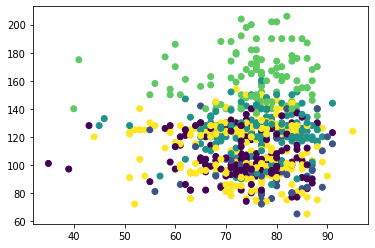

In [45]:
import matplotlib.pyplot as plt

rating_kmeans = KMeans(n_clusters=5, random_state=42)
rating_fit = rating_kmeans.fit_predict(rating_train.iloc[:, 3:])
rating_predict = rating_kmeans.predict(rating_test.iloc[:, 3:])

plt.scatter(rating_train.iloc[:, 11], rating_train.iloc[:, 3], c=rating_fit)
plt.show()

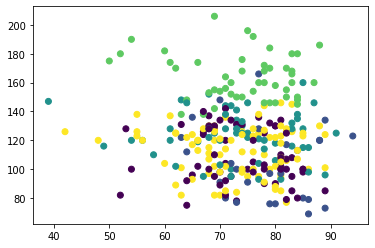

In [46]:
plt.scatter(rating_test.iloc[:, 11], rating_test.iloc[:, 3], c=rating_predict)
plt.show()

In [47]:
rating_train['rating'] = rating_fit.tolist()

In [48]:
rating_train.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
293,50 Ways to Say Goodbye,Train,dance pop,140,94,59,-3,14,74,0,5,73,43,2
460,Jealous - Remix,Nick Jonas,dance pop,93,71,68,-4,44,45,1,8,71,10,0
417,New Flame (feat. Usher & Rick Ross),Chris Brown,dance pop,142,63,70,-4,10,45,5,4,73,57,3
440,Don't Tell 'Em,Jeremih,chicago rap,98,53,86,-5,11,39,39,10,80,29,1
891,SICKO MODE,Travis Scott,hip hop,155,73,83,-4,12,45,1,22,86,73,3


In [49]:
rating_train_subset = rating_train[['title', 'rating']]
rating_train_subset.head()

,title,rating
293,50 Ways to Say Goodbye,2
460,Jealous - Remix,0
417,New Flame (feat. Usher & Rick Ross),3
440,Don't Tell 'Em,1
891,SICKO MODE,3


In [50]:
rating_test['rating'] = rating_predict.tolist()

In [51]:
rating_test_subset = rating_test[['title', 'rating']]
rating_test_subset.head()

,title,rating
897,If You're Over Me,4
343,Radioactive,0
287,I Knew You Were Trouble.,4
30,Whatcha Say,2
169,Midnight City,0


In [52]:
ratings = pd.concat([rating_train_subset, rating_test_subset])

In [53]:
len(ratings)

945

Data with ratings

In [71]:
df_subset_with_ratings = df_subset.merge(ratings)
len(df_subset_with_ratings)

945

In [72]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70,35,3
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68,6,2
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72,45,2
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80,16,0
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79,85,4


In [73]:
df_subset_with_ratings['rating'] = df_subset_with_ratings['rating'] + 1

In [74]:
df_subset_with_ratings.head()

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,acous,spch,pop,predict,rating
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,140,81,61,-6,23,23,0,6,70,35,4
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,138,89,68,-4,36,83,1,8,68,6,3
2,I Need A Dollar,Aloe Blacc,pop soul,95,48,84,-7,9,96,20,3,72,45,3
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,93,87,66,-4,4,38,11,12,80,16,1
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,104,85,69,-6,9,74,39,5,79,85,5


df_subset_with_ratings now has 1-5 "star" ratings for each song that has been generated by creating 5 clusters through k-means.